In [9]:
from sklearn. ensemble  import RandomForestRegressor
from sklearn. metrics import roc_auc_score
import pandas as pd
X=pd.read_csv(r'C:\Users\kinja\Documents\titanic\train2.csv')
Y=X.pop("Survived")
X.describe()




,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
X["Age"].fillna(X.Age.mean(),inplace=True)
X.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
numeric_variables=list(X.dtypes[X.dtypes!=object].index)  #object is the dtype in panda for str types in
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [36]:
model=RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X[numeric_variables], Y) #Y=X.pop("Survived")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [37]:
model.oob_score_

0.1361695005913669

In [28]:
Y_oob=model.oob_prediction_  
print("c-stat: ", roc_auc_score(Y, Y_oob) ) 

c-stat:  0.7399551550399983


In [29]:
Y_oob

array([0.71111111, 0.72413793, 0.02325581, 0.47368421, 0.16666667,
       0.34146341, 0.64705882, 0.17647059, 0.52777778, 0.75609756,
       0.72222222, 0.29411765, 0.38709677, 0.625     , 0.87096774,
       0.46875   , 0.04444444, 0.78571429, 0.41304348, 0.24242424,
       0.88571429, 0.64102564, 0.35897436, 0.5       , 0.27777778,
       0.05128205, 0.88636364, 0.71428571, 0.46875   , 0.36842105,
       0.47368421, 0.23684211, 0.84090909, 0.67647059, 0.82051282,
       0.475     , 0.33333333, 0.225     , 0.18421053, 0.53191489,
       0.275     , 0.57777778, 0.11904762, 0.90625   , 0.36363636,
       0.0625    , 0.61764706, 0.62162162, 0.44186047, 0.16129032,
       0.25      , 0.70833333, 0.25      , 0.61290323, 0.36363636,
       0.4       , 0.66666667, 0.5       , 1.        , 0.13157895,
       0.33333333, 0.2       , 0.76923077, 0.21428571, 0.5       ,
       0.25      , 0.36842105, 0.33333333, 0.4516129 , 0.10526316,
       0.88888889, 0.13157895, 0.51351351, 0.23076923, 0.34146

In [39]:
categoric_variables=list(X.dtypes[X.dtypes==object].index)  
X[categoric_variables].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [35]:
def describe_categorical(X):
    '''
    Just like describe() but for categorical values
    '''
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes==object]].describe().to_html()))
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Svend Lauritz",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [40]:
X.drop(["Name","Ticket","PassengerId"], axis=1, inplace=True)

In [42]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
X["Cabin"]=X.Cabin.apply(clean_cabin)

In [45]:
categorical_variables=['Sex', 'Cabin', 'Embarked']
for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies=pd.get_dummies(X[variable], prefix=variable) 
    X=pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [46]:
X #in IPython sometimes it shows a compressed table; in this case you need to write a s eparate printall function using display, HTML

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [52]:
model= RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, Y)
print ("C-stat: ", roc_auc_score(Y, model.oob_prediction_))

C-stat:  0.8635211282608464


In [54]:
model.feature_importances_ #nth element of the array is the importance of the nth column in X

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

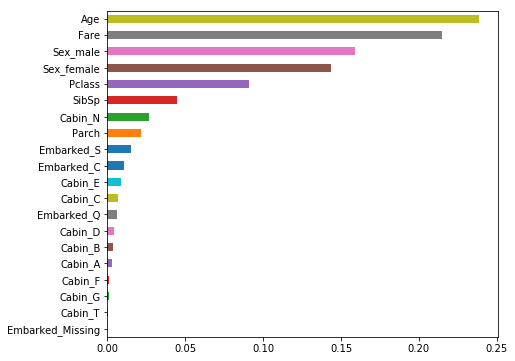

In [63]:
feature_importances=pd.Series(model.feature_importances_, index=X.columns)
imp=feature_importances.sort_values() #only sort() doesnt work on series, need to assign it back to say graph_'imp'
imp.plot(kind="barh", figsize=(7,6));

In [86]:
%%timeit
model =RandomForestRegressor(1000,  oob_score=True, n_jobs=1, random_state=42)
model.fit(X,Y)

3.58 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
%%timeit
model =RandomForestRegressor(1000,  oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,Y)

2.67 s ± 87.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


30 trees
C-stat:  0.8538704076524037

50 trees
C-stat:  0.8606983457429244

100 trees
C-stat:  0.8635211282608464

200 trees
C-stat:  0.8621922900755228

500 trees
C-stat:  0.863739494455629

1000 trees
C-stat:  0.8640430767264244

2000 trees
C-stat:  0.8634492271967107



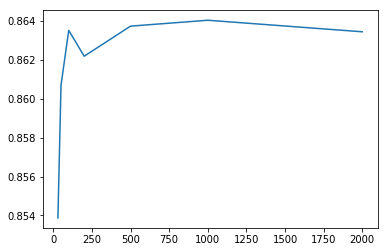

In [90]:
results=[]
n_estimator_options=[30, 50, 100, 200, 500, 1000, 2000]
for trees in n_estimator_options:
    model=RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, Y)
    print (trees, "trees")
    roc=roc_auc_score(Y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
pd.Series(results, n_estimator_options).plot();

auto max_features
C-stat:  0.8640430767264244

None max_features
C-stat:  0.8640430767264244

sqrt max_features
C-stat:  0.8633746631301995

log2 max_features
C-stat:  0.8633746631301995

0.9 max_features
C-stat:  0.8635344432727234

0.2 max_features
C-stat:  0.8633746631301995



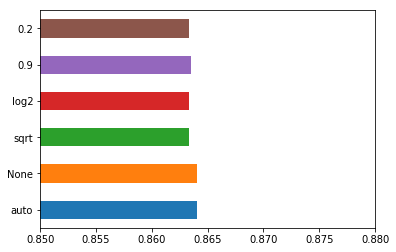

In [92]:
results=[]
max_features_options=["auto", None, "sqrt", "log2", 0.9, 0.2]
for maxf in max_features_options:
    model=RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=maxf)
    model.fit(X, Y)
    print (maxf, "max_features")
    roc=roc_auc_score(Y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85, .88));


1 min_samples_leaf
C-stat:  0.8640430767264244

2 min_samples_leaf
C-stat:  0.8696540227313881

3 min_samples_leaf
C-stat:  0.8715713844416749

4 min_samples_leaf
C-stat:  0.87347809414246

5 min_samples_leaf
C-stat:  0.8742690058479532

6 min_samples_leaf
C-stat:  0.8740293356341673

7 min_samples_leaf
C-stat:  0.8733049989880591

8 min_samples_leaf
C-stat:  0.871866977705344

9 min_samples_leaf
C-stat:  0.8692945174107096

10 min_samples_leaf
C-stat:  0.8674304157479309



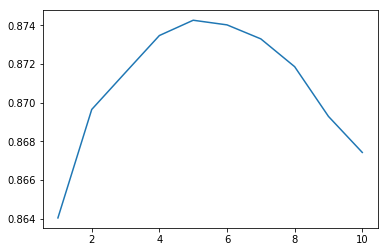

In [95]:
results=[]
min_samples_leaf_options=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for minl in min_samples_leaf_options:
    model=RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=minl)
    model.fit(X, Y)
    print (minl, "min_samples_leaf")
    roc=roc_auc_score(Y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
pd.Series(results, min_samples_leaf_options).plot();

In [96]:
model=RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=5)
model.fit(X, Y)
roc=roc_auc_score(Y, model.oob_prediction_)
print ("C-stat: ", roc)

C-stat:  0.8742690058479532
